# Introduction

### Dataset Origin
The dataset contains real-world information from Brazilian e-commerce transactions. It was originally made publicly available by *Olist*, a Brazilian online retail platform, for educational and analytical purposes. The data is anonymized and reflects actual customer orders, payments, products, and reviews.

### Objective
The main goal of this project is to build an interpretable model to support the Business Intelligence team by explaining the key factors behind positive or negative customer reviews.  
This model is designed for **explainability**, not for **predictive accuracy**. Its purpose is to clearly identify which variables have the greatest influence on customer satisfaction, helping prioritize service improvements. The business goal is not to predict but to address and resolve negative customer experiences.
The project is intended to be used and reviewed within a Jupyter Notebook environment.


### EDA 
**This section can be skiped**. No necessary code to execute model is on this secction. If dessired jump to Conclussions. This secction is a small sample to ejemplify the code used to explore de data.

In [4]:
### Data upload
import pandas as pd

data_path = "../Data/"

df_customers = pd.read_csv(data_path + "olist_customers_dataset.csv")
df_geolocation = pd.read_csv(data_path + "olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(data_path + "olist_order_items_dataset.csv")
df_payments = pd.read_csv(data_path + "olist_order_payments_dataset.csv")
df_reviews = pd.read_csv(data_path + "olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(data_path + "olist_orders_dataset.csv")
df_products = pd.read_csv(data_path + "olist_products_dataset.csv")
df_sellers = pd.read_csv(data_path + "olist_sellers_dataset.csv")
df_category = pd.read_csv(data_path + "product_category_name_translation.csv")

df_closed = pd.read_csv(data_path + "olist_closed_deals_dataset.csv")
df_leads = pd.read_csv(data_path + "olist_marketing_qualified_leads_dataset.csv")


Full data has 3 kind of columns, dates, numeric and text.
<!--  -->
Next is a sample of resources used for all data and evaluation process for each column kind. This was repeated for all columns.

In [206]:
### Easy access object
df_M = [ "df_customers", "df_geolocation", "df_order_items", "df_payments", "df_reviews", "df_products", "df_sellers", "df_closed", "df_leads"]

In [208]:
### Identify columns
df_customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

In [6]:
### Small sample of table 
df_sellers[:10]

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


*Text columns were explored as follows*

In [79]:
### Fast review of data 
df_customers["customer_state"][:10]

0    SP
1    SP
2    SP
3    SP
4    SP
5    SC
6    SP
7    MG
8    PR
9    MG
Name: customer_state, dtype: object

In [12]:
### Frequency summary for categories
df_customers["customer_state"].describe()

count     99441
unique       27
top          SP
freq      41746
Name: customer_state, dtype: object

In [ ]:
### Identification of unique values
df_customers["customer_state"].value_counts()

In [ ]:
### Nulls count per column
df_customers["customer_state"].isnull().sum()

In [10]:
### Identification of data type
df_customers["customer_state"].dtype

dtype('O')

In [ ]:
### Identification of unexpected lenghts 
df_customers[df_customers["customer_id"].str.len()!=32]

In [ ]:
### Values supposed to be unique are unique 
(df_closed["mql_id"].value_counts() > 1).sum()

In [ ]:
### For exploration of columns with big amount of cateogires 
for val in sorted(df_geolocation["geolocation_city"].unique()):
    print(val)

*Numeric columns were explored as follows*

In [ ]:
### Fast review of data 
df_products["product_height_cm"][:10]

In [ ]:
### Identification of data type
df_products["product_height_cm"].dtype

In [14]:
### Data distribution
df_products["product_height_cm"].describe()

count    32949.000000
mean        16.937661
std         13.637554
min          2.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        105.000000
Name: product_height_cm, dtype: float64

In [ ]:
### Nulls count per column
df_order_items["product_height_cm"].isnull().sum()

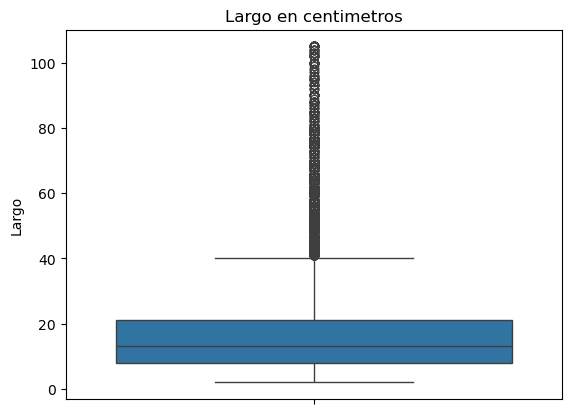

In [210]:
### Fast visualization of data distribution 
import matplotlib.pyplot as plt
import seaborn as sns 

sns.boxplot (y = df_products["product_height_cm"] )
plt.ylabel("Largo")
plt.title("Largo en centimetros")
plt.show()

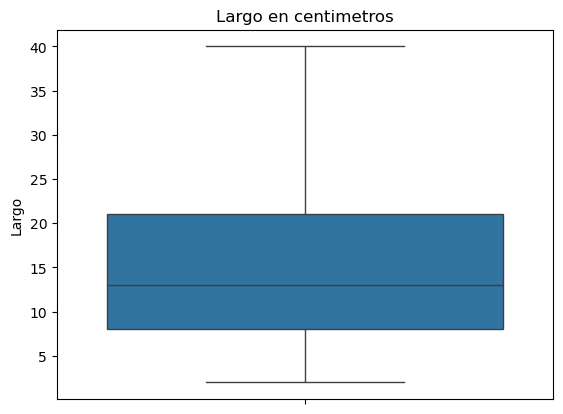

In [212]:
### Fast visualization of data distribution (showfliers = False)
import matplotlib.pyplot as plt
import seaborn as sns 

sns.boxplot (y = df_products["product_height_cm"], showfliers = False )
plt.ylabel("Largo")
plt.title("Largo en centimetros")
plt.show()

*Date columns were explored as follows*

In [ ]:
### Fast review of data 
df_orders["order_purchase_timestamp"][:10]

In [ ]:
### Identification of data type
df_orders["order_purchase_timestamp"].dtype

In [ ]:
### Nulls count per column
df_orders["order_purchase_timestamp"].isnull().sum()

## **EDA Conclusions**

### This was detected in data as relevant prior use as input for model and the selected correction.

- Nulls distribution.
- `df_geolocation["geolocation_city"]` has duplicated categories due to small variations in writing (Not in model).
- Date columns has wrong data type.
- `df_products["product_category_name"]` has duplicated categories due to small variations in writing.
- `df_products["product_category_name"]` has "alimentos", "alimentos_bebidas", "bebidas". Unclear overlap.    
- `df_sellers["seller_city"]` gas values that are likely an error (Not in model).

### This are the conslusions for the data.

- The nulls amount is relatively small, may be ereased  for esae cleniang without compromising analisis.
- `df_geolocation["geolocation_city"]` is not required in models son no cleaning process is taken.
- `df_products["product_category_name"]` has high granularity. Subcategories are not treated as issues.

## **Model Testing Instrucctions**
### The following is the full data preprocesing for the best model.
For a fast result of final model just execute the cells indicated as follows.
- Main step 1.
- Main step 2.
- Main step 3.
  
### Prior the finding of this, multiple data sets and models were tested. To try an specific model use parameters specified in `Results` secction and  do as follows.

- Round 1 (R1) lacks column "x["Days_Early"]", step #13 must be removed to reproduce  any R1 models. 
- For models LogReg_A_R1 and LogReg_B_R1  add step #19A.
- For model RF_D_R1 add step #19B.
- For models in round 2 (R2) the next cells are ready to execute, tuning cell can be ommited for RF_A_R2 but doesnt change model output.

In [ ]:
###19A Scaled data for linnear model 
x_train_columns = x_train.columns.copy()
x_train_Scaled = x_train.copy()
x_test_Scaled = x_test.copy()

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ["freight_value", "payment_installments", "product_weight_g" ]

x_train_Scaled[cols] = scaler.fit_transform(x_train[cols])
x_test_Scaled[cols] = scaler.transform(x_test[cols])

In [ ]:
###19B Alternative x removing low importance variables
x_trainB = x_train[["Days_TA", "price", "freight_value", "product_weight_g", "payment_installments", "customer_state_RJ", "payment_type_boleto", "product_category_name_moveis_decoracao"]]
x_testB = x_test[["Days_TA", "price", "freight_value", "product_weight_g", "payment_installments", "customer_state_RJ", "payment_type_boleto", "product_category_name_moveis_decoracao"]]


In [ ]:
###13 x["Days_Early"] column creation
x["Days_Early"] = ( x["order_estimated_delivery_date"] -x["order_delivered_customer_date"]  ).dt.days

**Main step 1** (cell below)

In [195]:
### Data preprocesing to add more FE

##1 Data upload
import pandas as pd

data_path = "../Data/"

df_customers = pd.read_csv(data_path + "olist_customers_dataset.csv")
df_geolocation = pd.read_csv(data_path + "olist_geolocation_dataset.csv")
df_order_items = pd.read_csv(data_path + "olist_order_items_dataset.csv")
df_payments = pd.read_csv(data_path + "olist_order_payments_dataset.csv")
df_reviews = pd.read_csv(data_path + "olist_order_reviews_dataset.csv")
df_orders = pd.read_csv(data_path + "olist_orders_dataset.csv")
df_products = pd.read_csv(data_path + "olist_products_dataset.csv")
df_sellers = pd.read_csv(data_path + "olist_sellers_dataset.csv")
df_category = pd.read_csv(data_path + "product_category_name_translation.csv")

df_closed = pd.read_csv(data_path + "olist_closed_deals_dataset.csv")
df_leads = pd.read_csv(data_path + "olist_marketing_qualified_leads_dataset.csv")

#2 Table for reference
df_Ma =  ["df_order_items", "df_payments", "df_products", "df_customers", "df_orders", "df_reviews"]

#3 Data type correction in date columns
import pandas as pd

for x in df_Ma:
    df = globals()[x]
    for z in df.columns:
        if z == "order_purchase_timestamp" or z == "order_delivered_customer_date" or z == "order_estimated_delivery_date":
            df[z] = pd.to_datetime(df[z])

#4 Preprocesing for df merge
a = df_order_items[[ "price", "freight_value", "order_id", "product_id" ]]
b = df_payments[[ "payment_type", "payment_installments", "order_id" ]]
c = df_products[[ "product_category_name", "product_weight_g", "product_id" ]]
d = df_customers[["customer_state", "customer_id"]]
e = df_orders[["order_purchase_timestamp", "order_delivered_customer_date", "customer_id", "order_id", "order_estimated_delivery_date"]]
f = df_reviews[["review_score", "order_id"]]

#5 df merge
import pandas as pd

TablaM = pd.merge( a, b, how = "inner", on = "order_id" )
TablaM = pd.merge( TablaM, e, how = "inner", on = "order_id" )
TablaM = pd.merge( TablaM, f, how = "inner", on = "order_id" )
TablaM = pd.merge( TablaM, c, how = "inner", on = "product_id" )
TablaM = pd.merge( TablaM, d, how = "inner", on = "customer_id" )

#6 Nulls erasing
TablaM = TablaM.dropna()

#7 Convert review_score into binary target. 1 for scores < 4, 0 otherwise
TablaM.loc[TablaM["review_score"]<4, "review_score"] = 1
TablaM.loc[TablaM["review_score"]>=4, "review_score"] = 0

#8 y creation
y = TablaM["review_score"]

#9 x creation
x = TablaM.drop("review_score", axis = 1)

#10 Duplicated categories converted 
x.loc[ x["product_category_name"] == "casa_conforto_2" , "product_category_name"] = "casa_conforto"
x.loc[ x["product_category_name"] == "eletrodomesticos_2" , "product_category_name"] = "eletrodomesticos"

#11 Categorical columns converted to dummies
import pandas as pd
cols = ["payment_type", "product_category_name", "customer_state"]
x = pd.get_dummies(x, columns = cols )

#12 x["Days_TA"] column creation
x["Days_TA"] = (x["order_delivered_customer_date"] - x["order_purchase_timestamp"]).dt.days

#13 x["Days_Early"] column creation
x["Days_Early"] = ( x["order_estimated_delivery_date"] -x["order_delivered_customer_date"]  ).dt.days

#14 Redundant and unnecesary columns ereased
x = x.drop(["order_delivered_customer_date", "order_purchase_timestamp", "order_estimated_delivery_date"], axis = 1)

#15 The most frequent categories are droped as they are considered base categories. 
x = x.drop(["product_category_name_cama_mesa_banho", "customer_state_SP", "payment_type_credit_card"], axis = 1)

#16 id columns droped due to being unnecesary for model training
import pandas as pd
x = x.drop (["order_id", "product_id", "customer_id"], axis = 1)

#17 train and test varaibles creation 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= .2, random_state = 42, stratify = y )


In [ ]:
### Used to decide cols in x_trainB and x_testB
### Only if step #13 was removed 
from sklearn.inspection import permutation_importance

result = permutation_importance(RF_B_R1, x_train, y_train, scoring='f1', n_repeats=5, random_state=42, n_jobs=-1)
importances_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': result.importances_mean
}).sort_values(by = "Importance")

In [ ]:
### RandomForestClassifier "balanced"
from sklearn.ensemble import RandomForestClassifier

RF_A_R2 = RandomForestClassifier(class_weight = "balanced", random_state = 42)
RF_A_R2.fit(x_train, y_train)
y_pred = RF_A_R2.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:",accuracy_score(y_test, y_pred))
print("f1:",f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

**Main step 2** (below)

In [197]:
### Basic Tuning for selected model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score, accuracy_score


RF_B_R2 = RandomForestClassifier(random_state=42, class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],        
    'max_depth': [None, 10, 20],       
    'min_samples_split': [2, 5],       
}

grid = GridSearchCV(
    RF_B_R2,
    param_grid,
    scoring='f1',  
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

RF_B_R2 = grid.best_estimator_
y_pred = RF_B_R2.predict(x_test)

# Performance Evaluation
print('f1_score:', f1_score(y_test, y_pred, average='binary'))
print('accuracy_score:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
f1_score: 0.574284304047384
accuracy_score: 0.8476619419790701
              precision    recall  f1-score   support

           0     0.8523    0.9697    0.9072     17397
           1     0.8153    0.4432    0.5743      5250

    accuracy                         0.8477     22647
   macro avg     0.8338    0.7065    0.7408     22647
weighted avg     0.8438    0.8477    0.8300     22647



**Main step 3** (below)

In [199]:
### Used for interpretability in final model 
from sklearn.inspection import permutation_importance

result = permutation_importance(RF_B_R2, x_train, y_train, scoring='f1', n_repeats=5, random_state=42, n_jobs=-1)
importances_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': result.importances_mean
}).sort_values(by = "Importance")
importances_df[-10:]

,Feature,Importance
18,product_category_name_beleza_saude,0.046827
87,customer_state_MG,0.047073
4,payment_type_boleto,0.068712
95,customer_state_RJ,0.077231
2,payment_installments,0.256661
3,product_weight_g,0.297740
1,freight_value,0.300039
0,price,0.337101
103,Days_TA,0.410922
104,Days_Early,0.415251


In [201]:
### Importances converted to csv
importances_df.to_csv("Importances.csv", index = False) 

## Results Presentation
As told before, multiple models were tested. Below is a summary of results at `Metrics_df` that can be reproduced with descriptions from `Models_df`. Next secction is suggested to not be skipped, all cells must be executed. 

In [41]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

Models_df = pd.read_csv("../Results/Model_Definitions_and_Results.csv")
Metrics_df = pd.read_csv("../Results/Performance_Metrics_per_Model.csv")

In [57]:
Models_df

,Model_Name,Model_Definition,Feature_Set,Round
0,LogReg_A_R1,"LogisticRegression(max_iter=5000, random_state=42)","x_train_Scaled, x_test_Scaled",R1
1,LogReg_B_R1,"LogisticRegression(class_weight='balanced', max_iter=5000, random_state=42)","x_train_Scaled, x_test_Scaled",R1
2,RF_A_R1,RandomForestClassifier(random_state=42),"x_train, x_test",R1
3,RF_B_R1,"RandomForestClassifier(class_weight='balanced', random_state=42)","x_train, x_test",R1
4,XGB_A_R1,XGBClassifier(random_state=42),"x_train, x_test",R1
5,XGB_B_R1,"XGBClassifier(random_state=42, scale_pos_weight=peso)","x_train, x_test",R1
6,RF_C_R1,"RandomForestClassifier(random_state=42, class_weight='balanced') + GridSearch","x_train, x_test",R1
7,RF_D_R1,"RandomForestClassifier(class_weight='balanced', random_state=42)","x_trainB, x_testB (subset of features)",R1
8,RF_A_R2,"RandomForestClassifier(class_weight='balanced', random_state=42)","x_train, x_test (with Days_Early)",R2
9,RF_B_R2,"RandomForestClassifier(random_state=42, class_weight='balanced') + GridSearch","x_train, x_test (with Days_Early)",R2


In [53]:
Metrics_df

,Model_Name,Precision_Class_1,Recall_Class_1,F1_Class_1
0,LogReg_A_R1,0.7456,0.1451,0.2430
1,LogReg_B_R1,0.3484,0.5238,0.4185
2,RF_A_R1,0.7838,0.4240,0.5503
3,RF_B_R1,0.7860,0.4206,0.5480
4,XGB_A_R1,0.7196,0.2269,0.3450
5,XGB_B_R1,0.4143,0.5270,0.4640
6,RF_C_R1,0.7342,0.4503,0.5582
7,RF_D_R1,0.7645,0.4316,0.5517
8,RF_A_R2,0.8485,0.4269,0.5680
9,RF_B_R2,0.8153,0.4432,0.5743


## Model Optimization By Threshold

In [76]:
### Proba variations testing with restrictions 
import numpy as np

from sklearn.metrics import precision_score, recall_score, f1_score

proba = RF_B_R2.predict_proba(x_test)[:, 1]
for z in np.arange(0.3, 0.6, 0.01):
    y_pred_thresh = (proba >= z).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    if (precision >= .7) and (recall>=.45):
        f1 = f1_score(y_test, y_pred_thresh)
        print (f"{z:.2f}: f1:{f1:.4f}, recall:{recall:.4f}, precision:{precision:.4f} ")

0.42: f1:0.5865, recall:0.4954, precision:0.7185 
0.43: f1:0.5861, recall:0.4878, precision:0.734 
0.44: f1:0.5845, recall:0.4798, precision:0.7475 
0.45: f1:0.5837, recall:0.4741, precision:0.7591 
0.46: f1:0.5832, recall:0.4682, precision:0.773 
0.47: f1:0.5806, recall:0.4611, precision:0.7837 
0.48: f1:0.5792, recall:0.4562, precision:0.793 
0.49: f1:0.5782, recall:0.4509, precision:0.8059 


**`Threshold = .49` is the optimized value for the `RF_B_R2` model** 

**Class 1** 
- *0.49*| **f1**: *57.82%*, **recall:** *45.09%*, **precision:** *80.59%*

In [ ]:
### Best model saving
import joblib
joblib.dump(RF_B_R2, 'RF_B_R2_model.pkl')

In [173]:
y.value_counts()

review_score
0    86982
1    26249
Name: count, dtype: int64

In [185]:
### Distribution for early/late arrivals between bad and good reviews
LA_BR = ((x["Days_Early"]<0) & (y==1)).sum()/y.value_counts()[1]
OTA_BR = ((x["Days_Early"]==0) & (y==1)).sum()/y.value_counts()[1]
EA_BR = ((x["Days_Early"]>0) & (y==1)).sum()/y.value_counts()[1]
LA_GR = ((x["Days_Early"]<0) & (y==0)).sum()/y.value_counts()[0]
OTA_GR = ((x["Days_Early"]==0) & (y==0)).sum()/y.value_counts()[0]
EA_GR = ((x["Days_Early"]>0) & (y==0)).sum()/y.value_counts()[0]

print(f"LA_BR:{LA_BR*100:.2f}%\nOTA_BR:{OTA_BR*100:.2f}%\nEA_BR:{EA_BR*100:.2f}%\nLA_GR:{LA_GR*100:.2f}%\nOTA_GR:{OTA_GR*100:.2f}%\nEA_GR:{EA_GR*100:.2f}%")

LA_BR:21.81%
OTA_BR:1.38%
EA_BR:76.81%
LA_GR:3.44%
OTA_GR:1.46%
EA_GR:95.10%


In [187]:
### Table for Flag on Early Arrivals creation
x["Flag_EA"] = (x["Days_Early"]>0).astype(int)
Flag = x[["Flag_EA"]].copy()
Flag["Target"] = y
Flag[:10]

,Flag_EA,Target
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [191]:
### Table converted to csv
Flag.to_csv("Flag_Table.csv", index=False)

# Project Conclusions
The most effective model to explain the scores was **RF_B_R2**, which corresponds to a `RandomForestClassifier` with balanced classes. The model was optimized by threshold calibration at **0.49**, with **F1**: *57.82%*, **Recall**: *45.09%*, and **Precision**: *80.59%*. The aim was to maintain recall above 45% and precision above 70%. These results are considered satisfactory, although more complex relationships remain to be discovered.

A key factor identified is the delivery timing. Early delivery is the norm rather than the exception, and while it does not guarantee positive reviews, its absence is strongly linked to negative outcomes.

However, as the model relies on actual delivery dates, it cannot be used for prediction unless these features are excluded. For a product-focused analysis, delivery-related columns should also be removed, as they impact customer experience but not whether product expectations are met.

Finally, though Random Forest is robust to collinearity, further analysis would be necessary to refine these insights.